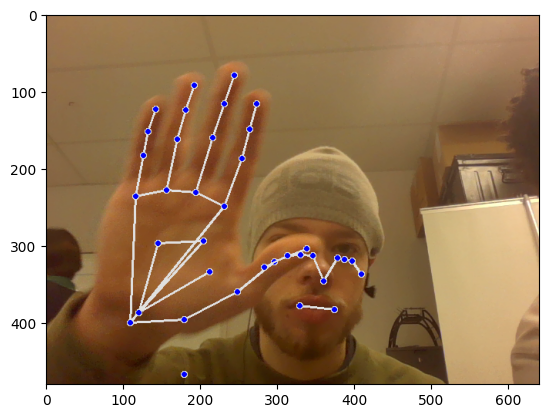

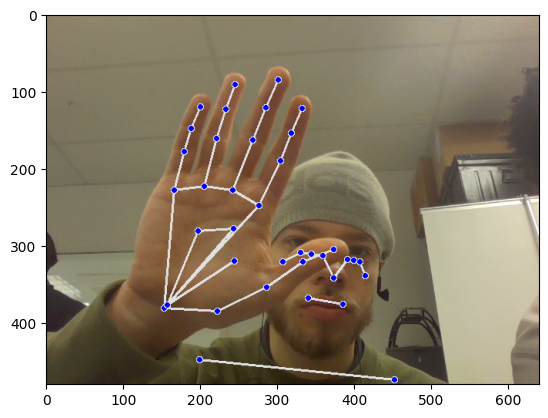

[[ 1.71554774e-01  8.33593726e-01  3.53450190e-07  0.00000000e+00]
 [ 2.81021416e-01  8.26878726e-01 -4.45021391e-02  0.00000000e+00]
 [ 3.87680650e-01  7.50249445e-01 -5.44937402e-02  0.00000000e+00]
 [ 4.63588655e-01  6.70544386e-01 -6.17109612e-02  0.00000000e+00]
 [ 5.29348016e-01  6.33887351e-01 -6.80110678e-02  0.00000000e+00]
 [ 3.61846447e-01  5.19302309e-01 -8.31670500e-03  0.00000000e+00]
 [ 3.98358822e-01  3.89740855e-01 -2.65946705e-02  0.00000000e+00]
 [ 4.12541151e-01  3.11575949e-01 -4.95425910e-02  0.00000000e+00]
 [ 4.26712960e-01  2.42390633e-01 -6.81420937e-02  0.00000000e+00]
 [ 3.03304434e-01  4.81614053e-01 -4.87465179e-03  0.00000000e+00]
 [ 3.37865472e-01  3.33692014e-01 -1.98834054e-02  0.00000000e+00]
 [ 3.60940486e-01  2.42491841e-01 -4.36543338e-02  0.00000000e+00]
 [ 3.82398874e-01  1.64816231e-01 -6.31339327e-02  0.00000000e+00]
 [ 2.43815154e-01  4.75624174e-01 -8.82109534e-03  0.00000000e+00]
 [ 2.66459376e-01  3.38154137e-01 -2.84481850e-02  0.00000000e

In [12]:
import mediapipe as mp  # Import mediapipe
import cv2 as cv  # Import opencv
import csv
import os
import numpy as np
import time
import matplotlib
from matplotlib import pyplot as plt
# import sklearn
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
def draw_mark(image, results):
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
def cap_imag():
    cap = cv.VideoCapture(0)
    ret, frame = cap.read()
    image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    k =cv.waitKey(1000)
    cap.release()
    cv.destroyAllWindows()
    return ret ,image
with mp_holistic.Holistic(static_image_mode=True) as holistic :
    ret,image=cap_imag()
    ret2,image2=cap_imag()

    results = holistic.process(image)
    results2 = holistic.process(image2)

    draw_mark(image2, results2)
    draw_mark(image, results)
plt.imshow(image)
plt.show()

plt.imshow(image2)
plt.show()
hand_mark = np.array([[res.x, res.y, res.z]for res in results.right_hand_landmarks.landmark])
# hand_mark_visibility=np.array([[res.visibility]for res in results.right_hand_landmarks.landmark])
print(hand_mark)
# pose = np.array([[res.x,res.y,res.z]for res in results.pose_landmarks.landmark])
# hand_mark2 = np.array([[res.x, res.y, res.z]for res in results2.right_hand_landmarks.landmark])
# pose2 = np.array([[res.x,res.y,res.z]for res in results2.pose_landmarks.landmark])
# depx =  abs(pose[11][0] - pose[12][0]) #distance epaule 

# epaule1 = np.array(pose[12][0:3])

# epaule2 = np.array(pose[11][0:3])

# origine=(epaule1+epaule2)/2
# #origine[0] += depx/2 # coordonnée de lorigine mid epaule

# dornose=abs(pose[0][1]-origine[1])

# dz=depx
# dnormaliser=np.array([depx,dornose,dz])
# normaliser=np.array([40,20,40])
# depx2 =  abs(pose2[11][0] - pose2[12][0]) #distance epaule 
# epaule1s = np.array(pose2[12][0:3])

# epaule2s = np.array(pose2[11][0:3])

# origines=(epaule1s+epaule2s)/2
# dornoses=abs(pose2[0][1]-origines[1])
# dz=depx2
# dnormalisers=np.array([depx2,dornoses,dz])
# new_hand_marks_coord=hand_mark-origine
# new_pose_marks_coord=pose-origine

# new_hand_marks_coord_normalized=new_hand_marks_coord*normaliser/dnormaliser
# new_pose_marks_coord_normalize=new_pose_marks_coord*normaliser/dnormaliser
# new_hand_marks_coord2=hand_mark2-origines
# new_pose_marks_coord2=pose2-origines

# new_hand_marks_coord_normalizeds=new_hand_marks_coord2*normaliser/dnormalisers
# new_pose_marks_coord_normalizes=new_pose_marks_coord2*normaliser/dnormalisers
# print(new_hand_marks_coord_normalized-new_hand_marks_coord_normalizeds)